# Plot size distribution - Casy counter 
### Gabi - 10/05/2016
Jens Hahn - 21/08/2016

## 1. <a href=#readdata> Read data </a> from *Excel* sheet using *pandas*
## 2. <a href=#boxwhiskers> Plot bos whiskers </a>

### Import packages
1. **matplotlib** for plotting 
2. **pandas** for data analysis

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import numpy as np
import scipy as sci

<a name='readdata' />

### Read data from *Excel* sheet

In [3]:
# load Excel sheet in pandas Dataframe
df = pd.read_excel('./CASY/20160510_CASY.xlsx', sheetname='Tabelle3')

In [4]:
# get sizes of cells (columns in Dataframe)
sizes = df.columns[7:]

Rename columns to initialise lists

In [5]:
# get data, remove metainformation
df_times = df.set_index('Time')
df_times = df_times[sizes]
df_times = df_times.T
sample_names = list(df_times.columns)
sample_names[0] = '0A'
sample_names[1] = '0B'
df_times.columns = sample_names

In [6]:
# time points for violin plot
time_line = [x for x in list(df_times.columns)]
time_line[0] = 0
time_line[1] = 5
time_line[-2] = 240
time_line[-1] = 250

Get data for box whiskers plot    
Threshold: **250 cells**

In [7]:
min_number = 250  # lower number of counts not taken into account

# get boxplot data
box_data = []
# iterate through samples
for sample in df_times.columns[:-2]:
    sample_col = []
    # iterate through sizes
    for i, val in enumerate(df_times[sample]):
        # write size into list for every counted cell once

        temp = [(df_times.index[i]/2.)**3. * 4./3. * np.pi for _ in range(val) if val>min_number]
        sample_col.extend(temp)
    box_data.append(sample_col)       

<a name='boxwhiskers' />

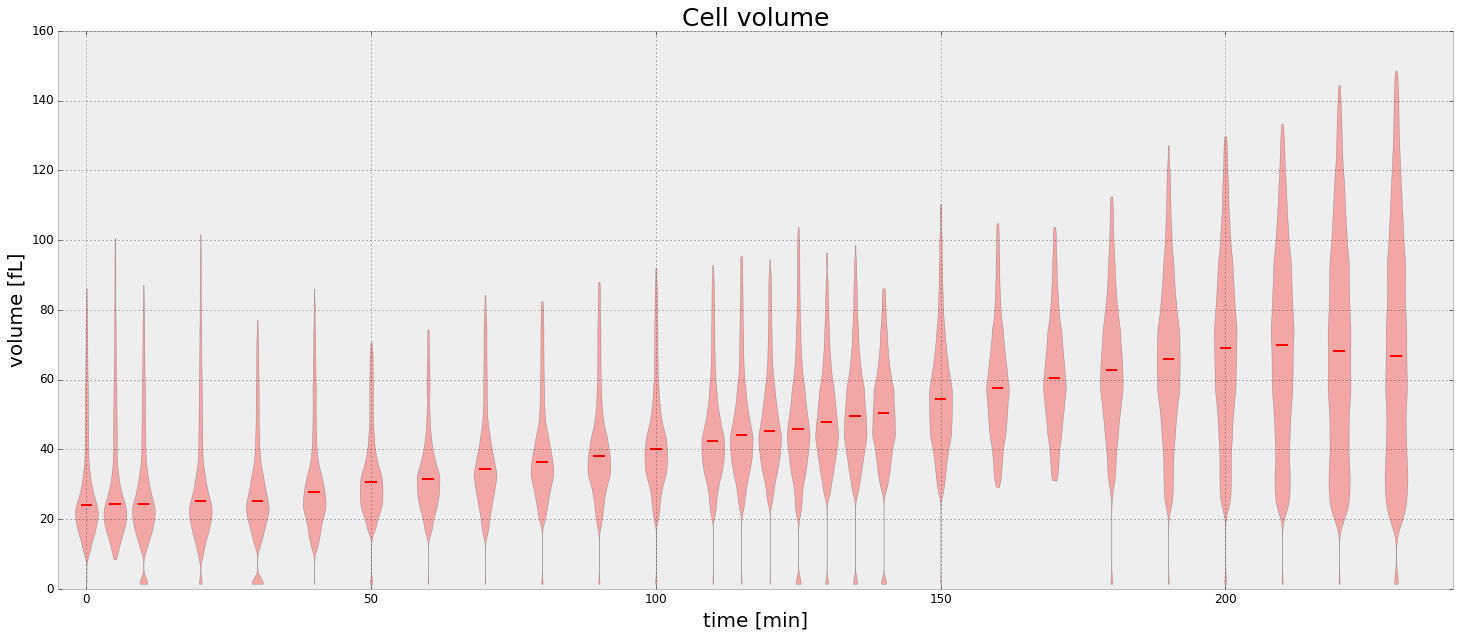

In [10]:
mpl.style.use('bmh')  # plot in different style

# change description for sample 'non synchronised'
sample_names[-2] = 'no syn'

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
bp = ax.violinplot(box_data, widths = 4, positions=[int(i) for i in time_line[:-2]], showextrema=False, points=250, showmedians=True)
#ax.set_ylim([2,7])
for pc in bp['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
ax.set_ylabel('volume [fL]', fontsize=20)
ax.set_xlim([-5,240])
ax.set_xlabel('time [min]', fontsize=20)
ax.set_title('Cell volume', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.savefig('violin_CASY.png')

### Plot box whiskers plot of size distribution
Threshold: **250 cells**

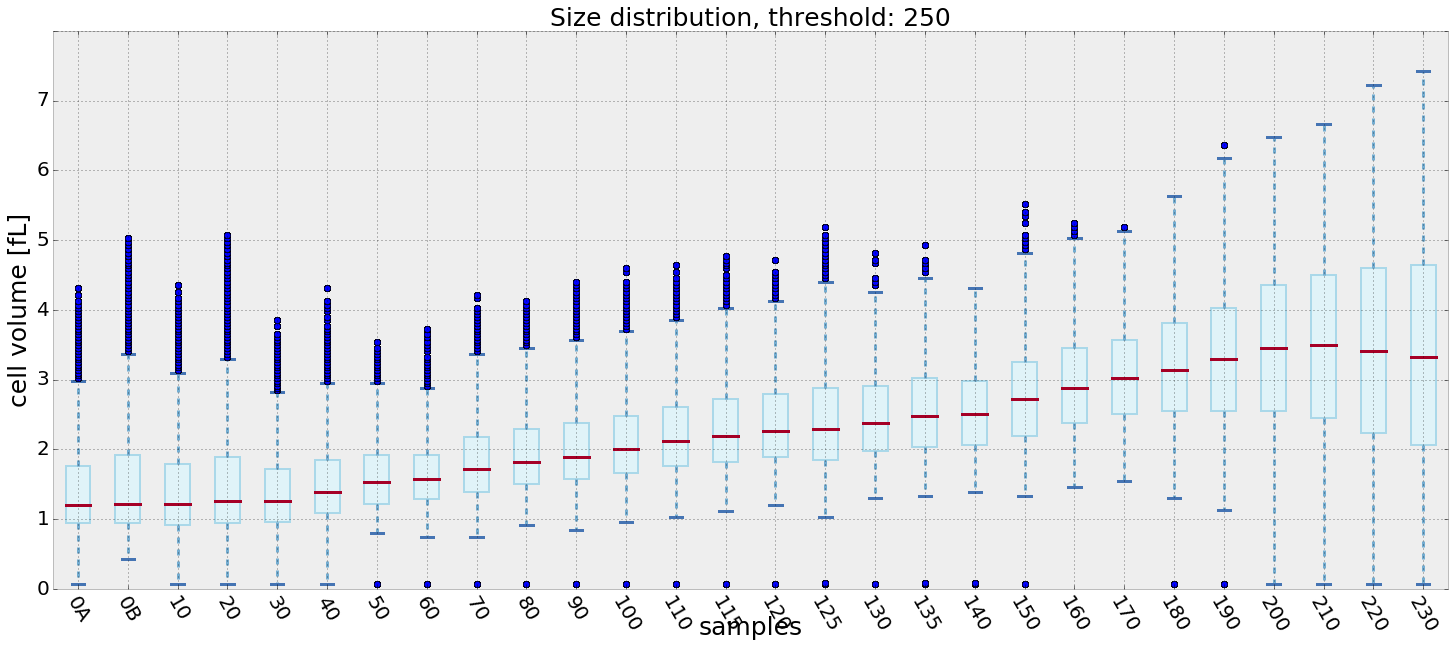

In [11]:
mpl.style.use('bmh')  # plot in different style

# change description for sample 'non synchronised'
sample_names[-2] = 'no syn'

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
bp = ax.boxplot(box_data, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=plt.cm.RdYlBu(0.7), linewidth=2)
    # change fill color
    box.set( facecolor = plt.cm.RdYlBu(0.6))
    
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color=plt.cm.RdYlBu(0.8), linewidth=3)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color=plt.cm.RdYlBu(0.9), linewidth=3)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color=plt.cm.RdYlBu(0), linewidth=3)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color=plt.cm.RdYlBu(0.99), alpha=1)

## Custom x-axis labels
ax.set_xticklabels(sample_names, rotation=-60, fontsize=20)

ax.set_title('Size distribution, threshold: ' + str(min_number), fontsize=25)
ax.set_ylabel('cell volume [fL]', fontsize=25)
ax.set_yticklabels(range(8), fontsize=20)
ax.set_xlabel('samples', fontsize=25, labelpad=-20)

# fig.savefig('box.pdf')